In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import timeit
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete") # Setting up the coding environment

Setup Complete


In [2]:
# Set the filepath to the dataset
filepath = 'data/household_power_consumption.txt'

# Read the dataset into numpy array, specifying dtype and skipping the header
datanp = np.genfromtxt(filepath, delimiter=";", dtype=None, names=True, encoding=None)

print(datanp)

[('16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400', '0.000', '1.000', 17.)
 ('16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', 16.)
 ('16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', 17.)
 ...
 ('26/11/2010', '21:00:00', '0.938', '0.000', '239.820', '3.800', '0.000', '0.000',  0.)
 ('26/11/2010', '21:01:00', '0.934', '0.000', '239.700', '3.800', '0.000', '0.000',  0.)
 ('26/11/2010', '21:02:00', '0.932', '0.000', '239.550', '3.800', '0.000', '0.000',  0.)]


In [3]:
# Set the filepath to the dataset
filepath = 'data/household_power_consumption.txt'

# Read the dataset into dataframe
df = pd.read_csv(filepath, sep=';', header=0)

# Print the data types of each column
print(df.dtypes)

# Print the number of rows
print("The DataFrame has", df.shape[0], "rows")

# Display the first five rows
df.head()

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object
The DataFrame has 2075259 rows


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# A little bit of Data Cleaning
df.drop(df[df.eq('?').any(axis=1)].index, inplace=True)

# Changing type or columns
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_columns] = df[numeric_columns].astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Print the data types of each column
print(df.dtypes)

# Print the number of rows
print("The DataFrame has", df.shape[0], "rows")

# Display the first five rows
df.head()

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object
The DataFrame has 2049280 rows


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


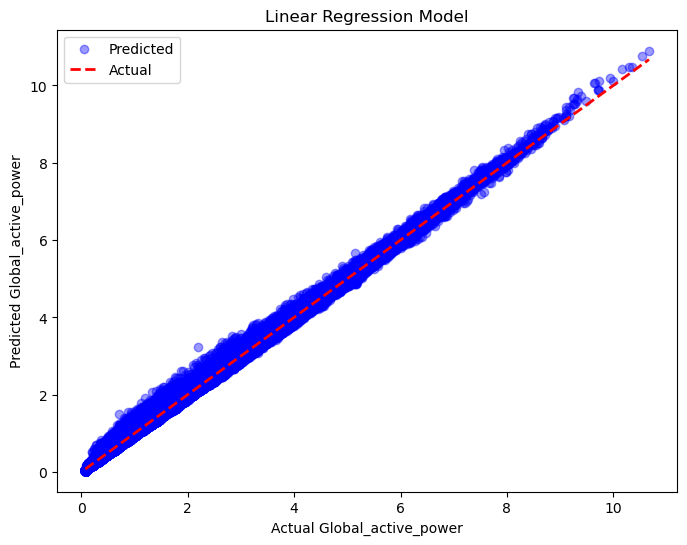

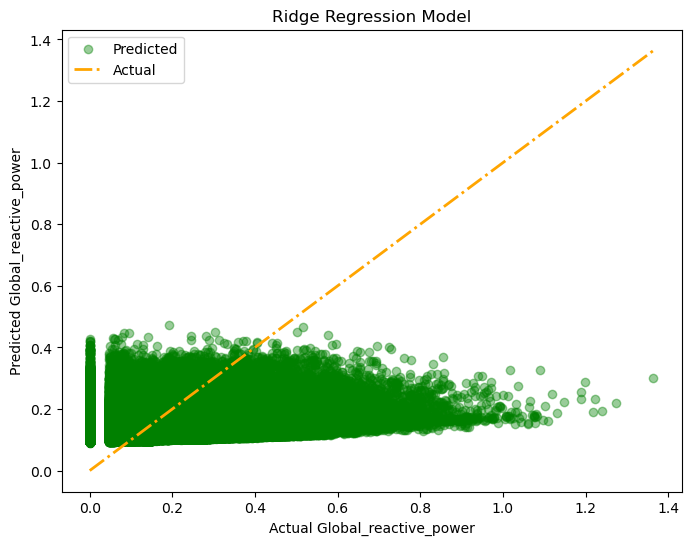

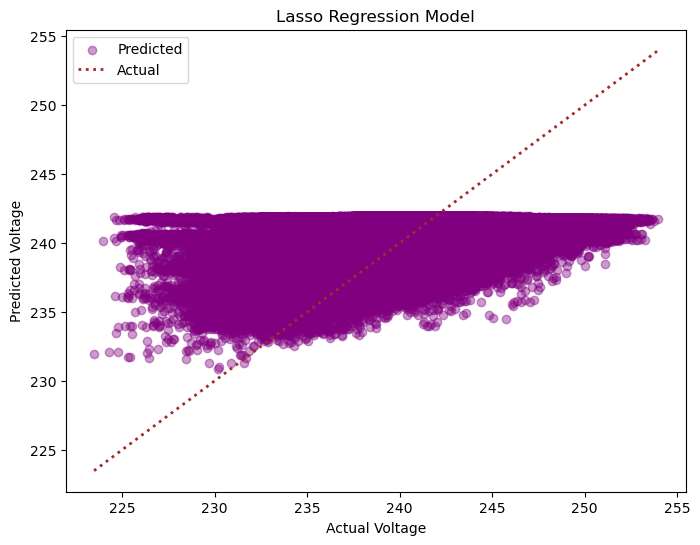

MSE for Linear Regression Model: 0.00218
MSE for Ridge Regression Model: 0.01166
MSE for Lasso Regression Model: 8.78362
The best model is: Linear Regression


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Numeric attributes  
numeric_cols = ['Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = df[numeric_cols]

# Target variables
y1 = df['Global_active_power']
y2 = df['Global_reactive_power'] 
y3 = df['Voltage']

# Divided the data into training and test sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X, y1, y2, y3, test_size=0.5, random_state=42)

# M 1: Line regression for recovering Global_active_power
model1 = LinearRegression()
model1.fit(X_train, y1_train)

# M 2: Ridge regression for recovering Global_reactive_power
model2 = Ridge()
model2.fit(X_train, y2_train)

# M 3: LASSO regression for recovering Voltage  
model3 = Lasso()
model3.fit(X_train, y3_train)

# Code for visualization
# M 1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, model1.predict(X_test), alpha=0.4, label='Predicted', color='blue')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', lw=2, label='Actual', color='red')
plt.xlabel('Actual Global_active_power')
plt.ylabel('Predicted Global_active_power')
plt.title('Linear Regression Model')
plt.legend()

# M 2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, model2.predict(X_test), alpha=0.4, label='Predicted', color='green')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], '-.', lw=2, label='Actual', color='orange')
plt.xlabel('Actual Global_reactive_power')
plt.ylabel('Predicted Global_reactive_power')
plt.title('Ridge Regression Model')
plt.legend()

# M 3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, model3.predict(X_test), alpha=0.4, label='Predicted', color='purple')
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], ':', lw=2, label='Actual', color='brown')
plt.xlabel('Actual Voltage')
plt.ylabel('Predicted Voltage')
plt.title('Lasso Regression Model')
plt.legend()

plt.show()

# Calculation of MSE for models
mse1 = mean_squared_error(y1_test, model1.predict(X_test))
print(f"MSE for Linear Regression Model: {mse1:.5f}")

mse2 = mean_squared_error(y2_test, model2.predict(X_test))
print(f"MSE for Ridge Regression Model: {mse2:.5f}") 

mse3 = mean_squared_error(y3_test, model3.predict(X_test))
print(f"MSE for Lasso Regression Model: {mse3:.5f}")

mse_dict = {"Linear": mse1, "Ridge": mse2, "Lasso": mse3}
best_model = min(mse_dict, key=mse_dict.get)
print(f"The best model is: {best_model} Regression")